In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import json
import torchvision.transforms as transforms
import numpy as np
import os
import skimage
import skimage.io as io
import cv2
import xlrd
import pandas as pd
from mmcv.image import imread, imwrite, imrescale
import mmcv
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import random
from skimage.exposure import histogram,equalize_hist,equalize_adapthist,rescale_intensity,is_low_contrast

In [2]:
from imgaug import augmenters as iaa
import imgaug as ia
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from imgaug.augmentables import Keypoint, KeypointsOnImage
#aug = iaa.Sometimes(0.5, [iaa.Affine(scale=(0.2, 0.7))])
#iaa.Sequential([iaa.Affine(scale=(0.2, 0.7))])
aug1 = iaa.Affine(rotate=90)
aug2 = iaa.Affine(rotate=-90)
aug3 = iaa.Affine(rotate=180)

In [3]:
from mmcv.opencv_info import USE_OPENCV2

if not USE_OPENCV2:
    from cv2 import IMREAD_COLOR, IMREAD_GRAYSCALE, IMREAD_UNCHANGED
else:
    from cv2 import CV_LOAD_IMAGE_COLOR as IMREAD_COLOR
    from cv2 import CV_LOAD_IMAGE_GRAYSCALE as IMREAD_GRAYSCALE
    from cv2 import CV_LOAD_IMAGE_UNCHANGED as IMREAD_UNCHANGED

In [4]:
annotations1 = json.load(open('D:/Harish/code/Poles/data/FINAL.json'))
#annotations2 = json.load(open('D:/Harish/code/panorama/cyclo_data/gaurav.json'))
#annotations2 = json.load(open('D:/Harish/code/panorama/mmdetection-master/train_data/via_region_anuhya.json'))
#annotations3 = json.load(open('D:/Harish/code/panorama/mmdetection-master/train_data/via_region_data.json'))
annotations = list(annotations1.values()) #+ list(annotations2.values())+ list(annotations3.values())
annotations_a = [a for a in annotations if a['regions']]
annotations_b = [a for a in annotations if not a['regions']]
len(annotations_a)

494

In [5]:
len(annotations_b)

337

In [6]:
annotations1 = json.load(open('D:/Harish/code/panorama/cyclo_data/har.json'))
annotations2 = json.load(open('D:/Harish/code/panorama/cyclo_data/gaurav2.json'))
#annotations2 = json.load(open('D:/Harish/code/panorama/mmdetection-master/train_data/via_region_anuhya.json'))
#annotations3 = json.load(open('D:/Harish/code/panorama/mmdetection-master/train_data/via_region_data.json'))
annotations = list(annotations2.values()) #+ list(annotations2.values())+ list(annotations3.values())
annotations_a = [a for a in annotations if a['regions']]
annotations_b = [a for a in annotations if not a['regions']]
len(annotations_a)

76

In [3]:
gau = {'sd_2':'sb_2','sd_1':'sb_1','fb_1':'fh_1','signboard_base_1':'b_1',
 'signboard_1':'sb_1','signboard_base_2':'b_2','signboard_2':'sb_2'}

In [9]:
classes = []
for a in annotations_a:
    image_info = {}
    bbox = []
    polygons = [r['shape_attributes'] for r in a['regions'].values()]
    values = [r['region_attributes'] for r in a['regions'].values() if r['region_attributes']]
    bbox_ = []
    kp = []
    if len(values)>0:
        if 'class' in values[0].keys():
            class_ = [r['class'].strip().lower() for r in values if r['class'].strip().lower()!='']
            if len(class_) ==0:
                class_ = [r['Class'].strip().lower() for r in values]
            elif len(class_) !=len(polygons):
                print(a['filename'])
                print(values)
        elif 'CLASS' in values[0].keys():
            class_ = [r['CLASS'].strip().lower() for r in values]
            if len(class_) !=len(polygons):
                print(a['filename'])
        for c in class_:
            if c in ['firehydrant_base','firehydrant']:
                print(a['filename'])
            #if c in gau.keys():
            #    c = gau[c]
            if c not in classes:
                classes.append(c)
classes

Canadapoles68.jpg
Canadapoles235.jpg
Canadapoles311.jpg
Canadapoles312.jpg
Canadapoles385.jpg
Canadapoles410.jpg
Canadapoles611.jpg


['b_1',
 'lp_1',
 'ep_1',
 'b_2',
 'lp_2',
 'ep_2',
 'b_3',
 'lp_3',
 'b_4',
 'b_5',
 'ep_3',
 'lp_4',
 'ep_5',
 'lp_5',
 'ep_4',
 'b_6',
 'ep_6',
 'b_7',
 'ep_7',
 'b_8',
 'ep_8',
 'b_9',
 'lp_9',
 'b_10',
 'ep_10',
 'b-1',
 'b-3',
 'lp-1']

In [61]:
import torch 
a = torch.tensor([0.5, 1.0, 2.0])
torch.sqrt(a)

tensor([0.7071, 1.0000, 1.4142])

In [62]:
1/torch.sqrt(a)

tensor([1.4142, 1.0000, 0.7071])

In [6]:
classes = []
for a in annotations_a:
    image_info = {}
    bbox = []
    polygons = [r['shape_attributes'] for r in a['regions'].values()]
    values = [r['region_attributes'] for r in a['regions'].values() if r['region_attributes']]
    bbox_ = []
    kp = []
    if len(values)>0:
        class_ = [r['CLASS'].strip().lower() for r in values]
        #class_ = [gau[r] for r in class_]
        for c in class_:
            if c in ['b-1','b4','b_!','lp_!','b-3','lp-1']:
                print(a['filename'])
            if c not in classes:
                classes.append(c)
classes

#b-1,b4,b_!,lp_!


['b_1',
 'lp_1',
 'ep_1',
 'b_2',
 'lp_2',
 'ep_2',
 'b_3',
 'lp_3',
 'b_4',
 'b_5',
 'ep_3',
 'lp_4',
 'ep_5',
 'lp_5',
 'ep_4',
 'b_6',
 'ep_6',
 'b_7',
 'ep_7',
 'b_8',
 'ep_8',
 'b_9',
 'lp_9',
 'b_10',
 'ep_10']

In [5]:
annotations_a[0]

{'fileref': '',
 'size': 664295,
 'filename': 'WE0Y4GM9_3.jpg',
 'base64_img_data': '',
 'file_attributes': {},
 'regions': {'0': {'shape_attributes': {'name': 'rect',
    'x': 1018,
    'y': 363,
    'width': 20,
    'height': 104},
   'region_attributes': {'class': 'sb_1'}},
  '1': {'shape_attributes': {'name': 'point', 'cx': 1028, 'cy': 463},
   'region_attributes': {'class': 'b_1'}}}}

In [7]:
for i in range(1000):
    random.shuffle(annotations_a)
    random.shuffle(annotations_a)
    random.shuffle(annotations_b)
    random.shuffle(annotations_b)

In [11]:
len(annotations_b)

335

In [12]:
len(annotations_a)

496

In [ ]:
img = skimage.io.imread('D:/Harish/code/panorama/lidar_preprocess/chk/filtered_7365_11822.png')
if img.shape[-1] == 4:
    img = img[:,:,:-1]
shp = min(img.shape[:-1])
img3 = cv2.addWeighted (img,4, cv2.GaussianBlur(img, (0,0) , shp*0.1) ,-4 ,32)
io.imsave('D:/Harish/code/panorama/lidar_preprocess/chk/filtered_7365_11822_post2.png',img3)

In [8]:
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

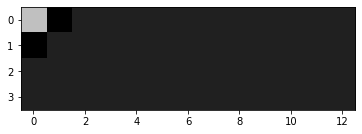

In [58]:
img = skimage.io.imread('D:/Harish/code/panorama/chk_low/filtered_7265_12263.png')
plt.imshow(img)

In [9]:
annotations_a[0]

{'fileref': '',
 'size': 1279486,
 'filename': 'Canadapoles235.jpg',
 'base64_img_data': '',
 'file_attributes': {},
 'regions': {'0': {'shape_attributes': {'name': 'point', 'cx': 185, 'cy': 344},
   'region_attributes': {'CLASS': 'B_1'}},
  '1': {'shape_attributes': {'name': 'point', 'cx': 680, 'cy': 568},
   'region_attributes': {'CLASS': 'B_2'}},
  '2': {'shape_attributes': {'name': 'rect',
    'x': 167,
    'y': 280,
    'width': 97,
    'height': 92},
   'region_attributes': {'CLASS': 'EP_1'}},
  '3': {'shape_attributes': {'name': 'rect',
    'x': 659,
    'y': 514,
    'width': 87,
    'height': 73},
   'region_attributes': {'CLASS': 'EP_2'}}}}

In [14]:
s = 'marker_2'
s.split('_')[1]

'2'

In [28]:
gau = {'manhole_base':'manhole_base_1',
       'manhole':'manhole_1','manhole_1_base':'manhole_base_1',
       'stormdrain_3_base':'stormdrain_base_3','stormdrain_1_base':'stormdrain_base_1','stormdrain_2_base':'stormdrain_base_2'
      ,'stormdrain_base':'stormdrain_base_1','stormdrain':'stormdrain_1','stromdrain_base':'stormdrain_base_1',
      'stromdrain':'stormdrain_1','manhole_2_base':'manhole_base_2','manhole_bottom':'manhole_base_1','manhole_3_base':'manhole_base_3',
      'manhole_4_base':'manhole_base_4'}

In [25]:
len(complete)

1096

In [112]:
ip = r'Z:\UK_Source\Cyclomedia_ledcor_images\2nd_area_us-ledc-190903'
fname= open(r"D:\sample.txt","r")
lis = [x.strip() for x in fname.readlines()]
for filename in os.walk(ip):
    if(filename in lis):
        print(filename)

['WE0WP8WM', 'WE0WP8LR', 'WE0WOC5C', 'WE0X0E87', 'WE0WOALS', 'WE0WO8DK', 'WE101V0C', 'WE0WOLAO', 'WE0WOA25', 'WE0WOLNU', 'WE0WO8RN', 'WE0WOOVS', 'WE0WOOYS', 'WE0XNPIM', 'WE0WOKSD', 'WE0WPGO9', 'WE0XNOCL', 'WE0WPP41', 'WE0WOO8E', 'WE0WOA1Z', 'WE0WO903', 'WE0WO976', 'WE0WOLYT', 'WE0WP8Y5', 'WE0WQ1JG', 'WE0WOOQE', 'WE0X0D7T', 'WE0WO8NZ', 'WE0WONRT', 'WE0WPOWK', 'WE0WPFRK', 'WE0WOOCI', 'WE0XNONH', 'WE0WOP39', 'WE0WOM1O', 'WE0WPOGD', 'WE0WOM3K', 'WE0WPPDD', 'WE0WOCC2', 'WE0WOCGH', 'WE0WOM5F', 'WE0WOM7H', 'WE0X0AJ3', 'WE0WOOYG', 'WE0X0ARI', 'WE0XNOPL', 'WE0WOBW5', 'WE0WOOFO', 'WE0WPOT5', 'WE0WPOQ7', 'WE0WPNND', 'WE0XNP8A', 'WE0WPP90', 'WE0WOONF', 'WE0WPOZ4', 'WE0WOP61', 'WE0WPQ9K', 'WE0WPPOG', 'WE0WOC7D', 'WE0WPB94', 'WE0WOBSM', 'WE0WPE8B', 'WE0WO8DC', 'WE10A1PO', 'WE0WQ1NT', 'WE0WPOSS', 'WE0WOCFW', 'WE0X0AHR', 'WE0WOLA4', 'WE0WOMPO', 'WE0WPNUB', 'WE0WP9P2', 'WE0WQ2KX', 'WE0WOND4', 'WE0WQ23D', 'WE0X0B6T', 'WE0XNP1H', 'WE0WOCIM', 'WE0WPEXO', 'WE0WPQ1W', 'WE0WO8S5', 'WE0WOLE5', 'WE0WP8AU', 'WE

In [87]:
import shutil
import os
ip=r'Z:\UK_Source\Cyclomedia_ledcor_images\2nd_area_us-ledc-190903\WE0WOL'
fname= open(r"D:\sample.txt","r")
lis = [x.strip() for x in fname.readlines()]
#print(lis)
count = 1
for filename in os.listdir(ip):
    print(filename)
    if(filename.replace('.jpg','') in lis):
        shutil.copy(ip+"\\"+filename,"D:\\Jan2\\"+filename)    
        count = count + 1
        print (count)

WE0WOL00.jpg
2
WE0WOL01.jpg
WE0WOL02.jpg
WE0WOL03.jpg
WE0WOL04.jpg
WE0WOL05.jpg
WE0WOL06.jpg
WE0WOL07.jpg
WE0WOL08.jpg
WE0WOL09.jpg
WE0WOL0A.jpg
WE0WOL0B.jpg
WE0WOL0C.jpg
WE0WOL0D.jpg
WE0WOL0E.jpg
WE0WOL0F.jpg
WE0WOL0G.jpg
WE0WOL0H.jpg
WE0WOL0I.jpg
WE0WOL0J.jpg
WE0WOL0K.jpg
WE0WOL0L.jpg
WE0WOL0M.jpg
WE0WOL0N.jpg
WE0WOL0O.jpg
WE0WOL0P.jpg
WE0WOL0Q.jpg
WE0WOL0R.jpg
WE0WOL0S.jpg
WE0WOL0T.jpg
WE0WOL0U.jpg
WE0WOL0V.jpg
WE0WOL0W.jpg
WE0WOL0X.jpg
WE0WOL0Y.jpg
WE0WOL0Z.jpg
WE0WOL10.jpg
WE0WOL11.jpg
WE0WOL12.jpg
WE0WOL13.jpg
WE0WOL14.jpg
WE0WOL15.jpg
WE0WOL16.jpg
WE0WOL17.jpg
WE0WOL18.jpg
WE0WOL19.jpg
WE0WOL1A.jpg
WE0WOL1B.jpg
WE0WOL1C.jpg
WE0WOL1D.jpg
WE0WOL1E.jpg
WE0WOL1F.jpg
WE0WOL1G.jpg
WE0WOL1H.jpg
WE0WOL1I.jpg
WE0WOL1J.jpg
WE0WOL1K.jpg
WE0WOL1L.jpg
WE0WOL1M.jpg
WE0WOL1N.jpg
WE0WOL1O.jpg
WE0WOL1P.jpg
WE0WOL1Q.jpg
WE0WOL1R.jpg
WE0WOL1S.jpg
WE0WOL1T.jpg
WE0WOL1U.jpg
WE0WOL1V.jpg
WE0WOL1W.jpg
WE0WOL1X.jpg
WE0WOL1Y.jpg
WE0WOL1Z.jpg
WE0WOL20.jpg
WE0WOL21.jpg
WE0WOL22.jpg
WE0WOL23.jpg
WE0WOL24.j

WE0WOLYL.jpg
WE0WOLYM.jpg
WE0WOLYN.jpg
WE0WOLYO.jpg
WE0WOLYP.jpg
WE0WOLYQ.jpg
WE0WOLYR.jpg
WE0WOLYS.jpg
WE0WOLYT.jpg
80
WE0WOLYU.jpg
WE0WOLYV.jpg
WE0WOLYW.jpg
WE0WOLYX.jpg
WE0WOLYY.jpg
WE0WOLYZ.jpg
WE0WOLZ0.jpg
WE0WOLZ1.jpg
WE0WOLZ2.jpg
WE0WOLZ3.jpg
WE0WOLZ4.jpg
WE0WOLZ5.jpg
WE0WOLZ6.jpg
WE0WOLZ7.jpg
WE0WOLZ8.jpg
WE0WOLZ9.jpg
WE0WOLZA.jpg
WE0WOLZB.jpg
WE0WOLZC.jpg
WE0WOLZD.jpg
WE0WOLZE.jpg
WE0WOLZF.jpg
WE0WOLZG.jpg
WE0WOLZH.jpg
WE0WOLZI.jpg
WE0WOLZJ.jpg
WE0WOLZK.jpg
WE0WOLZL.jpg
WE0WOLZM.jpg
WE0WOLZN.jpg
WE0WOLZO.jpg
WE0WOLZP.jpg
WE0WOLZQ.jpg
WE0WOLZR.jpg
WE0WOLZS.jpg
WE0WOLZT.jpg
WE0WOLZU.jpg
WE0WOLZV.jpg
WE0WOLZW.jpg
WE0WOLZX.jpg
WE0WOLZY.jpg
WE0WOLZZ.jpg


In [10]:
gau = {'sd_2':'sb_2','sd_1':'sb_1','fb_1':'fh_1','signboard_base_1':'b_1',
 'signboard_1':'sb_1','signboard_base_2':'b_2','signboard_2':'sb_2'}

In [26]:
len(annotations_b[:500])

500

In [9]:
path = 'D:/Harish/code/Poles/data/ALL'
out = 'D:/Harish/code/Poles/data/train_30_01/'
#class_dict={'crack':1,'edgeline':2,'middleline':3,'pothole':4,'unpaved':5}
class_dict={'lp':1,'ep':2}
ignore = []
complete = []
for a in annotations_a:
    image_info = {}
    bbox = []
    tmp_chk = []
    polygons = [r['shape_attributes'] for r in a['regions'].values()]
    values = [r['region_attributes'] for r in a['regions'].values() if r['region_attributes']]
    bbox_ = []
    kp = []
    classes = []
    if len(values)>0:
        class_ = [r['CLASS'].strip().lower() for r in values]
        for i in range(len(class_)):
            try:
                if 'lp' in class_[i] or 'ep' in class_[i] :
                    if class_[i] in tmp_chk:
                        continue
                    tmp_chk.append(class_[i])
                    bot = 'b_' + class_[i].split('_')[1]
                    bot_idx = class_.index(bot)
                    if polygons[bot_idx]['cx'] < polygons[i]['x']:
                        polygons[i]['x'] = polygons[bot_idx]['cx']
                    if polygons[bot_idx]['cx'] > polygons[i]['x']+polygons[i]['width']:
                        polygons[i]['width'] = polygons[bot_idx]['cx'] - polygons[i]['x']
                    
                    if polygons[bot_idx]['cy'] < polygons[i]['y']:
                        polygons[i]['y'] = polygons[bot_idx]['cy']
                    if polygons[bot_idx]['cy'] > polygons[i]['y']+polygons[i]['height']:
                        polygons[i]['height'] = polygons[bot_idx]['cy'] - polygons[i]['y']
                    
                    label_ = [polygons[i]['x'],polygons[i]['y'],polygons[i]['x']+polygons[i]['width'],polygons[i]['y']+polygons[i]['height'],polygons[bot_idx]['cx'],polygons[bot_idx]['cy']]
                    bbox.append(label_)
                    bb1 = BoundingBox(x1=label_[0], x2=label_[2], y1=label_[1], y2=label_[3])
                    bbox_.append(bb1)
                    kp_ = Keypoint(x=polygons[bot_idx]['cx'], y=polygons[bot_idx]['cy'])
                    kp.append(kp_)
                    #tmp_cls = class_[i].replace(class_[i].split('_')[0]+'_','')
                    classes.append(class_dict[class_[i].split('_')[0]])         
            except Exception as e:
                ignore.append(a['filename'])
                print('error')
                print(e)
                print(a['filename'])
    else:
        ignore.append(a['filename'])
        print('here')
        print(a['filename'])
    if a['filename'] in ignore:
        continue
    image_path = os.path.join(path, a['filename'])
    if not os.path.exists(image_path):
        ignore.append(a['filename'])
        print('here1')
        print(a['filename'])
        continue
    
    if len(classes) == 0:
        print('here2')
        print(a['filename'])
        continue
            
    img = skimage.io.imread(image_path)
    if img.shape[-1] == 4:
        img = img[:,:,:-1]
    #shp = min(img.shape[:-1])
    #img = cv2.addWeighted (img,4, cv2.GaussianBlur(img, (0,0) , shp*0.1) ,-4 ,32)
    name = a['filename'].replace('.jpg','_post1.jpg')
    io.imsave(out+name,img)
    height, width = img.shape[:2]
    #print(a['filename'])
    image_info['filename'] = name
    image_info['width'] = width
    image_info['height'] = height
    ann = {}
    ann['labels'] = np.array(classes, dtype=np.int32)
    ann['bboxes'] = bbox
    image_info['ann'] = ann
    complete.append(image_info)
    image_info = {}
    bbox = []
    
    bb = BoundingBoxesOnImage(bbox_, shape=img.shape)
    kk = KeypointsOnImage(kp, shape=img.shape)
    img = np.transpose(img,[2,0,1])
    
    aug = aug1.to_deterministic()
    images_aug = aug.augment_images(img)
    images_aug = np.transpose(images_aug,[1,2,0])
    bbs_aug = aug.augment_bounding_boxes(bb)
    kk_aug = aug.augment_keypoints(kk)
    #augment_keypoints
    name = a['filename'].replace('.jpg','_post2.jpg')
    io.imsave(out+name,images_aug)
    height, width = images_aug.shape[:2]
    #print(a['filename'])
    image_info['filename'] = name
    image_info['width'] = width
    image_info['height'] = height
    ann = {}
    classes_ = []
    #ann['labels'] = ann['labels'] -1 
    for i in range(len(bbs_aug.bounding_boxes)):
        x1,y1,x2,y2=int(bbs_aug.bounding_boxes[i].x1),int(bbs_aug.bounding_boxes[i].y1),int(bbs_aug.bounding_boxes[i].x2),int(bbs_aug.bounding_boxes[i].y2)
        x3,y3 = round(kk_aug.keypoints[i].x),round(kk_aug.keypoints[i].y)
        if x1 <0 or x2 >width or y1 < 0 or y2 > height:
            continue
        bbox.append([x1,y1,x2,y2,x3,y3])
        classes_.append(classes[i])
    ann['bboxes'] = bbox
    ann['labels'] = np.array(classes_, dtype=np.int32)
    image_info['ann'] = ann
    if len(bbox)!=0:
        complete.append(image_info)
    image_info = {}
    bbox = []
    
    aug = aug2.to_deterministic()
    images_aug = aug.augment_images(img)
    images_aug = np.transpose(images_aug,[1,2,0])
    bbs_aug = aug.augment_bounding_boxes(bb)
    kk_aug = aug.augment_keypoints(kk)
    name = a['filename'].replace('.jpg','_post3.jpg')
    io.imsave(out+name,images_aug)
    height, width = images_aug.shape[:2]
    #print(a['filename'])
    image_info['filename'] = name
    image_info['width'] = width
    image_info['height'] = height
    ann = {}
    classes_ = []
    #ann['labels'] = ann['labels'] -1 
    for i in range(len(bbs_aug.bounding_boxes)):
        x1,y1,x2,y2=int(bbs_aug.bounding_boxes[i].x1),int(bbs_aug.bounding_boxes[i].y1),int(bbs_aug.bounding_boxes[i].x2),int(bbs_aug.bounding_boxes[i].y2)
        x3,y3 = round(kk_aug.keypoints[i].x),round(kk_aug.keypoints[i].y)
        if x1 <0 or x2 >width or y1 < 0 or y2 > height:
            continue
        bbox.append([x1,y1,x2,y2,x3,y3])
        classes_.append(classes[i])
    ann['bboxes'] = bbox
    ann['labels'] = np.array(classes_, dtype=np.int32)
    image_info['ann'] = ann
    if len(bbox)!=0:
        complete.append(image_info)
    image_info = {}
    bbox = []
    
    aug = aug3.to_deterministic()
    images_aug = aug.augment_images(img)
    images_aug = np.transpose(images_aug,[1,2,0])
    bbs_aug = aug.augment_bounding_boxes(bb)
    kk_aug = aug.augment_keypoints(kk)
    name = a['filename'].replace('.jpg','_post4.jpg')
    io.imsave(out+name,images_aug)
    height, width = images_aug.shape[:2]
    #print(a['filename'])
    image_info['filename'] = name
    image_info['width'] = width
    image_info['height'] = height
    ann = {}
    classes_ = []
    #ann['labels'] = ann['labels'] -1 
    for i in range(len(bbs_aug.bounding_boxes)):
        x1,y1,x2,y2=int(bbs_aug.bounding_boxes[i].x1),int(bbs_aug.bounding_boxes[i].y1),int(bbs_aug.bounding_boxes[i].x2),int(bbs_aug.bounding_boxes[i].y2)
        x3,y3 = round(kk_aug.keypoints[i].x),round(kk_aug.keypoints[i].y)
        if x1 <0 or x2 >width or y1 < 0 or y2 > height:
            continue
        bbox.append([x1,y1,x2,y2,x3,y3])
        classes_.append(classes[i])
    ann['bboxes'] = bbox
    ann['labels'] = np.array(classes_, dtype=np.int32)
    image_info['ann'] = ann
    if len(bbox)!=0:
        complete.append(image_info)
    image_info = {}
    bbox = []

In [12]:
len(complete)

2061

In [11]:
path = 'D:/Harish/code/Poles/data/ALL'
out = 'D:/Harish/code/Poles/data/train_30_01/'
#class_dict={'crack':1,'edgeline':2,'middleline':3,'pothole':4,'unpaved':5}
for a in annotations_b:
    image_info = {}
    bbox = []
    classes = [0]
    image_path = os.path.join(path, a['filename'])
    if not os.path.exists(image_path):
        ignore.append(a['filename'])
        print('here1')
        print(a['filename'])
        continue
            
    img = skimage.io.imread(image_path)
    if img.shape[-1] == 4:
        img = img[:,:,:-1]
    #shp = min(img.shape[:-1])
    #img_adapteq = equalize_adapthist(img.copy(), clip_limit=0.03)
    name = a['filename'].replace('.jpg','_post.jpg')
    io.imsave(out+name,img)
    height, width = img.shape[:2]
    #print(a['filename'])
    image_info['filename'] = name
    image_info['width'] = width
    image_info['height'] = height
    ann = {}
    ann['labels'] = np.array(classes, dtype=np.int32)
    bbox.append([0,0,width/2,height/2,width/4,height/4])
    ann['bboxes'] = bbox
    image_info['ann'] = ann
    complete.append(image_info)

C:\ProgramData\Anaconda3\envs\layer\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/Harish/code/Poles/data/train_30_01/Canadapoles184_post.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\ProgramData\Anaconda3\envs\layer\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/Harish/code/Poles/data/train_30_01/Canadapoles877_post.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\ProgramData\Anaconda3\envs\layer\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/Harish/code/Poles/data/train_30_01/Canadapoles760_post.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\ProgramData\Anaconda3\envs\layer\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/Harish/code/Poles/data/train_30_01/Canadapoles720_post.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\ProgramData\Anaconda3\envs\layer\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/Harish/code/Poles/data/

In [44]:
path = 'D:/Harish/code/panorama/lidar_data'
out = 'D:/Harish/code/panorama/lidar_preprocess/chk/'
#class_dict={'crack':1,'edgeline':2,'middleline':3,'pothole':4,'unpaved':5}
ignore = []
complete = []
for a in annotations_a:
    image_info = {}
    bbox = []
    polygons = [r['shape_attributes'] for r in a['regions'].values()]
    values = [r['region_attributes'] for r in a['regions'].values() if r['region_attributes']]
    if len(values)>0:
        classes = [1 for r in values]
        #classes = [class_dict[r] for r in classes]            
    else:
        ignore.append(a['filename'])
        print('here')
        print(a['filename'])
    if a['filename'] in ignore:
        continue
    image_path = os.path.join(path, a['filename'])
    if not os.path.exists(image_path):
        ignore.append(a['filename'])
        print('here1')
        print(a['filename'])
        continue
    
    if len(polygons) != len(classes) or len(classes) == 0:
        print('here2')
        print(a['filename'])
        continue
            
    img = skimage.io.imread(image_path)
    if img.shape[-1] == 4:
        img = img[:,:,:-1]
    shp = min(img.shape[:-1])
    img = cv2.addWeighted (img,4, cv2.GaussianBlur(img, (0,0) , shp*0.1) ,-4 ,32)
    name = a['filename'].replace('.png','_post1.png')
    #io.imsave(out+name,img)
    height, width = img.shape[:2]
    #print(a['filename'])
    image_info['filename'] = name
    image_info['width'] = width
    image_info['height'] = height
    ann = {}
    ann['labels'] = np.array(classes, dtype=np.int32)
    bbox_ = []
    #ann['labels'] = ann['labels'] -1 
    for i in range(len(polygons)):
        label_ = [polygons[i]['x'],polygons[i]['y'],polygons[i]['x']+polygons[i]['width'],polygons[i]['y']+polygons[i]['height']]
        bbox.append(label_)
        bb1 = BoundingBox(x1=label_[0], x2=label_[2], y1=label_[1], y2=label_[3])
        bbox_.append(bb1)
    ann['bboxes'] = bbox
    image_info['ann'] = ann
    complete.append(image_info)
    image_info = {}
    bbox = []
    
    bb = BoundingBoxesOnImage(bbox_, shape=img.shape)
    img = np.transpose(img,[2,0,1])
    
    aug = aug1.to_deterministic()
    images_aug = aug.augment_images(img)
    images_aug = np.transpose(images_aug,[1,2,0])
    bbs_aug = aug.augment_bounding_boxes(bb)
    #augment_keypoints
    name = a['filename'].replace('.png','_post2.png')
    #io.imsave(out+name,images_aug)
    height, width = images_aug.shape[:2]
    #print(a['filename'])
    image_info['filename'] = name
    image_info['width'] = width
    image_info['height'] = height
    ann = {}
    classes_ = []
    #ann['labels'] = ann['labels'] -1 
    for i in range(len(bbs_aug.bounding_boxes)):
        x1,y1,x2,y2=int(bbs_aug.bounding_boxes[i].x1),int(bbs_aug.bounding_boxes[i].y1),int(bbs_aug.bounding_boxes[i].x2),int(bbs_aug.bounding_boxes[i].y2)
        if x1 <0 or x2 >width or y1 < 0 or y2 > height:
            continue
        bbox.append([x1,y1,x2,y2])
        classes_.append(classes[i])
    ann['bboxes'] = bbox
    ann['labels'] = np.array(classes_, dtype=np.int32)
    image_info['ann'] = ann
    if len(bbox)!=0:
        complete.append(image_info)
    image_info = {}
    bbox = []
    
    aug = aug2.to_deterministic()
    images_aug = aug.augment_images(img)
    images_aug = np.transpose(images_aug,[1,2,0])
    bbs_aug = aug.augment_bounding_boxes(bb)
    name = a['filename'].replace('.png','_post3.png')
    #io.imsave(out+name,images_aug)
    height, width = images_aug.shape[:2]
    #print(a['filename'])
    image_info['filename'] = name
    image_info['width'] = width
    image_info['height'] = height
    ann = {}
    classes_ = []
    #ann['labels'] = ann['labels'] -1 
    for i in range(len(bbs_aug.bounding_boxes)):
        x1,y1,x2,y2=int(bbs_aug.bounding_boxes[i].x1),int(bbs_aug.bounding_boxes[i].y1),int(bbs_aug.bounding_boxes[i].x2),int(bbs_aug.bounding_boxes[i].y2)
        if x1 <0 or x2 >width or y1 < 0 or y2 > height:
            continue
        bbox.append([x1,y1,x2,y2])
        classes_.append(classes[i])
    ann['bboxes'] = bbox
    ann['labels'] = np.array(classes_, dtype=np.int32)
    image_info['ann'] = ann
    if len(bbox)!=0:
        complete.append(image_info)
    image_info = {}
    bbox = []
    
    aug = aug3.to_deterministic()
    images_aug = aug.augment_images(img)
    images_aug = np.transpose(images_aug,[1,2,0])
    bbs_aug = aug.augment_bounding_boxes(bb)
    name = a['filename'].replace('.png','_post4.png')
    #io.imsave(out+name,images_aug)
    height, width = images_aug.shape[:2]
    #print(a['filename'])
    image_info['filename'] = name
    image_info['width'] = width
    image_info['height'] = height
    ann = {}
    classes_ = []
    #ann['labels'] = ann['labels'] -1 
    for i in range(len(bbs_aug.bounding_boxes)):
        x1,y1,x2,y2=int(bbs_aug.bounding_boxes[i].x1),int(bbs_aug.bounding_boxes[i].y1),int(bbs_aug.bounding_boxes[i].x2),int(bbs_aug.bounding_boxes[i].y2)
        if x1 <0 or x2 >width or y1 < 0 or y2 > height:
            continue
        bbox.append([x1,y1,x2,y2])
        classes_.append(classes[i])
    ann['bboxes'] = bbox
    ann['labels'] = np.array(classes_, dtype=np.int32)
    image_info['ann'] = ann
    if len(bbox)!=0:
        complete.append(image_info)
    image_info = {}
    bbox = []

In [46]:
path = 'D:/Harish/code/panorama/lidar_data'
out = 'D:/Harish/code/panorama/lidar_preprocess/chk/'
#class_dict={'crack':1,'edgeline':2,'middleline':3,'pothole':4,'unpaved':5}
for a in annotations_b[:100]:
    image_info = {}
    bbox = []
    classes = [0]
    image_path = os.path.join(path, a['filename'])
    if not os.path.exists(image_path):
        ignore.append(a['filename'])
        print('here1')
        print(a['filename'])
        continue
            
    img = skimage.io.imread(image_path)
    if img.shape[-1] == 4:
        img = img[:,:,:-1]
    shp = min(img.shape[:-1])
    img = cv2.addWeighted (img,4, cv2.GaussianBlur(img, (0,0) , shp*0.1) ,-4 ,32)
    name = a['filename'].replace('.png','_post.png')
    io.imsave(out+name,img)
    height, width = img.shape[:2]
    #print(a['filename'])
    image_info['filename'] = name
    image_info['width'] = width
    image_info['height'] = height
    ann = {}
    ann['labels'] = np.array(classes, dtype=np.int32)
    bbox.append([0,0,width/2,height/2])
    ann['bboxes'] = bbox
    image_info['ann'] = ann
    complete.append(image_info)

In [8]:
s = 'filtered_7302_11818.png'
s = s.replace('.png','_post2.png')
s

'filtered_7302_11818_post2.png'

In [ ]:
filtered_7365_11822_post2.png

In [28]:
complete[0]

{'filename': 'filtered_7384_11841_post4.png',
 'width': 1501,
 'height': 1501,
 'ann': {'labels': array([1, 1]),
  'bboxes': [[1188, 867, 1309, 961],
   [1437, 860, 1496, 968],
   [539, 1188, 633, 1309],
   [532, 1437, 640, 1496],
   [867, 191, 961, 312],
   [860, 4, 968, 63],
   [190, 539, 312, 633],
   [3, 532, 63, 640]]}}

In [13]:
len(complete)

2061

In [14]:
for i in range(10000):
    random.shuffle(complete)
    random.shuffle(complete)

In [19]:
with open('train_lts.json', 'w') as json_file:  
    json.dump(complete, json_file, cls=NumpyEncoder)

In [24]:
for c in complete:
    if 'filtered_7363_11803' in c['filename']:
        print(c)

{'filename': 'filtered_7363_11803_post3.png', 'width': 1501, 'height': 1501, 'ann': {'labels': array([1]), 'bboxes': [[701, 1459, 788, 1498]]}}
{'filename': 'filtered_7363_11803_post1.png', 'width': 1501, 'height': 1501, 'ann': {'labels': array([1]), 'bboxes': [[2, 701, 41, 788]]}}
{'filename': 'filtered_7363_11803_post2.png', 'width': 1501, 'height': 1501, 'ann': {'labels': array([1]), 'bboxes': [[712, 2, 799, 41]]}}
{'filename': 'filtered_7363_11803_post4.png', 'width': 1501, 'height': 1501, 'ann': {'labels': array([1]), 'bboxes': [[1459, 712, 1498, 799]]}}


In [58]:
for c in complete:
    if 'filtered_7366_11803' in c['filename']:
        print(c)

{'filename': 'filtered_7366_11803_post1.png', 'width': 1501, 'height': 1203, 'ann': {'labels': array([1, 1]), 'bboxes': [[1218, 918, 1307, 1011, 1240, 968], [1442, 932, 1498, 1043, 1476, 986]]}}
{'filename': 'filtered_7366_11803_post2.png', 'width': 1501, 'height': 1203, 'ann': {'bboxes': [[340, 1069, 433, 1158, 383.0, 1091.0]], 'labels': array([1])}}
{'filename': 'filtered_7366_11803_post3.png', 'width': 1501, 'height': 1203, 'ann': {'bboxes': [[1067, 44, 1160, 133, 1117.0, 111.0]], 'labels': array([1])}}
{'filename': 'filtered_7366_11803_post4.png', 'width': 1501, 'height': 1203, 'ann': {'bboxes': [[192, 191, 282, 284, 260.0, 234.0], [1, 159, 57, 270, 24.0, 216.0]], 'labels': array([1, 1])}}


In [38]:
complete[:10]

[{'filename': 'filtered_7384_11841_post1.png',
  'width': 1501,
  'height': 1501,
  'ann': {'labels': array([1, 1]),
   'bboxes': [[1188, 867, 1309, 961], [1437, 860, 1496, 968]]}},
 {'filename': 'filtered_7384_11841_post2.png',
  'width': 1501,
  'height': 1501,
  'ann': {'labels': array([1, 1]),
   'bboxes': [[539, 1188, 633, 1309], [532, 1437, 640, 1496]]}},
 {'filename': 'filtered_7384_11841_post3.png',
  'width': 1501,
  'height': 1501,
  'ann': {'labels': array([1, 1]),
   'bboxes': [[867, 191, 961, 312], [860, 4, 968, 63]]}},
 {'filename': 'filtered_7384_11841_post4.png',
  'width': 1501,
  'height': 1501,
  'ann': {'labels': array([1, 1]),
   'bboxes': [[190, 539, 312, 633], [3, 532, 63, 640]]}}]

In [15]:
train = complete[:1600]
val = complete[1600:]
len(val)

461

In [16]:
with open('train_new.json', 'w') as json_file:  
    json.dump(train, json_file, cls=NumpyEncoder)
with open('val_new.json', 'w') as json_file:  
    json.dump(val, json_file, cls=NumpyEncoder)

In [101]:
len(train)

529